In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv('D:\Akshaya\Aml project\Global_Superstore2.csv', encoding='latin-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
df.isna().sum().reset_index().sort_values(by=0,ascending=False)

,index,0
11,Postal Code,41296
0,Row ID,0
13,Region,0
22,Shipping Cost,0
21,Profit,0
20,Discount,0
19,Quantity,0
18,Sales,0
17,Product Name,0
16,Sub-Category,0


In [6]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [7]:
df['Order Date'][0]

'31-07-2012'

In [8]:
df['Order Date']=df['Order Date'].apply(lambda x: pd.to_datetime(x,format='%d-%m-%Y'))
df['Ship Date']=df['Ship Date'].apply(lambda x: pd.to_datetime(x,format='%d-%m-%Y'))

In [9]:
df['Order Year']=df['Order Date'].apply(lambda x: x.year)


In [10]:
df['Order Year'].describe()

count    51290.000000
mean      2012.777208
std          1.098931
min       2011.000000
25%       2012.000000
50%       2013.000000
75%       2014.000000
max       2014.000000
Name: Order Year, dtype: float64

In [11]:
df['Order Month']=df['Order Date'].apply(lambda x: x.month)

In [12]:
df['Order Year_Order Month']=df['Order Year'].astype(str)+'-'+df['Order Month'].astype(str)

In [13]:
df.groupby('Order Year_Order Month')['Order ID'].nunique().reset_index()

,Order Year_Order Month,Order ID
0,2011-1,216
1,2011-10,401
2,2011-11,563
3,2011-12,620
4,2011-2,183
5,2011-3,277
6,2011-4,267
7,2011-5,295
8,2011-6,468
9,2011-7,250


In [14]:
#all data from 2011 to 2014 is there for all months

In [15]:
df.groupby('Order Year')['Sales'].sum().reset_index()

,Order Year,Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


In [16]:
df['Market-Region']=df['Market']+'-'+df['Region']

In [17]:
#sales increases year on year

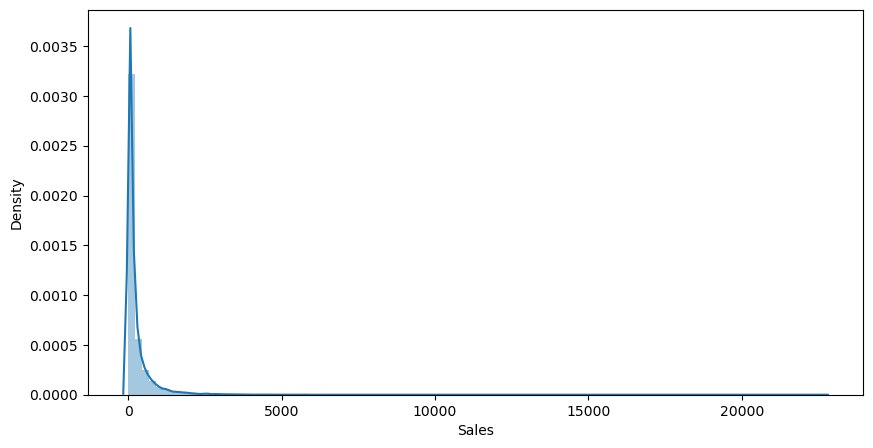

In [18]:
#selection of dependent variable
#histogram for sales
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'],bins=100)
plt.show()



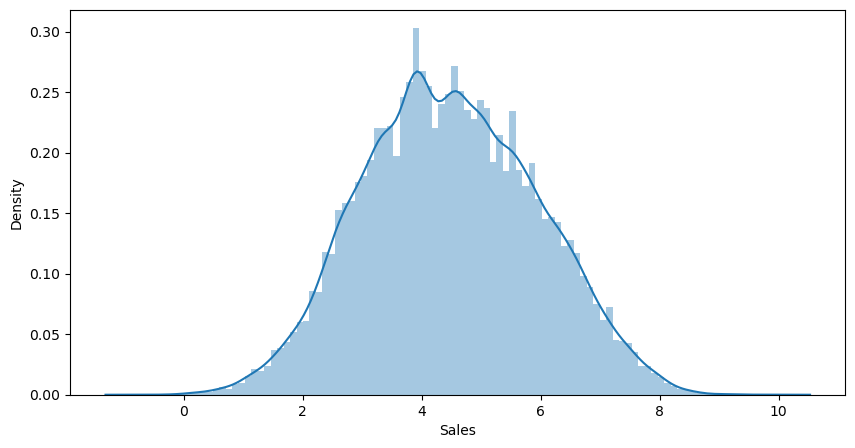

In [19]:
#histogram of log(sales)
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['Sales']),bins=100)
plt.show()


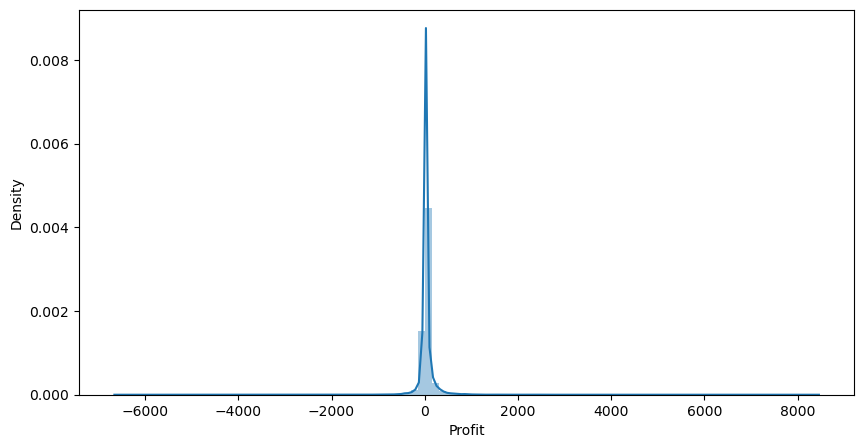

In [20]:
#hsitogram of profit
plt.figure(figsize=(10,5))
sns.distplot(df['Profit'],bins=100)
plt.show()


In [21]:
#taking log of sales as our dependent variable
df['log_sales']=np.log(df['Sales'])


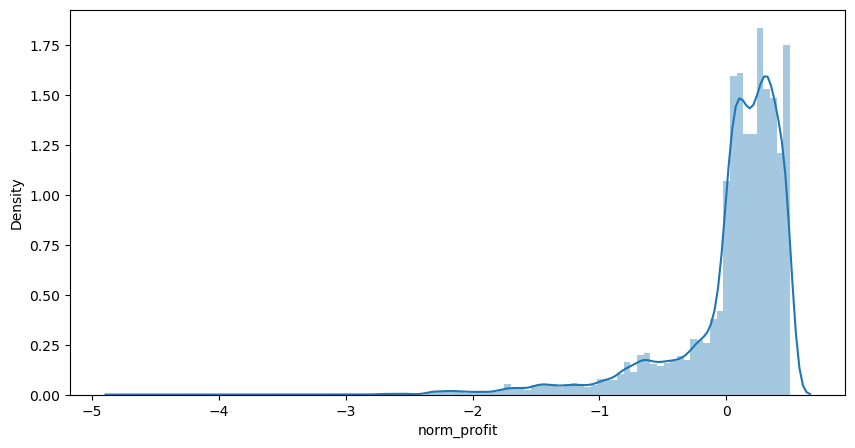

In [22]:
#normalise profit and sales
df['norm_profit']=df['Profit']/df['Sales']

#histogram of normalised profit
plt.figure(figsize=(10,5))
sns.distplot(df['norm_profit'],bins=100)
plt.show()

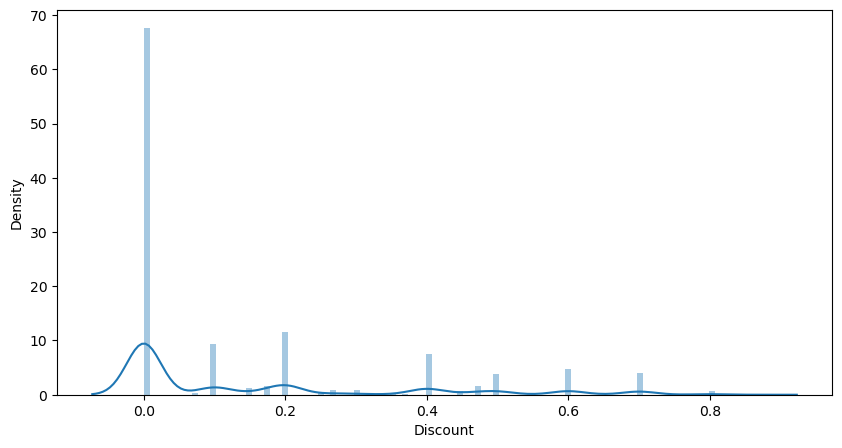

In [23]:
#histogram of discount
plt.figure(figsize=(10,5))
sns.distplot(df['Discount'],bins=100)
plt.show()

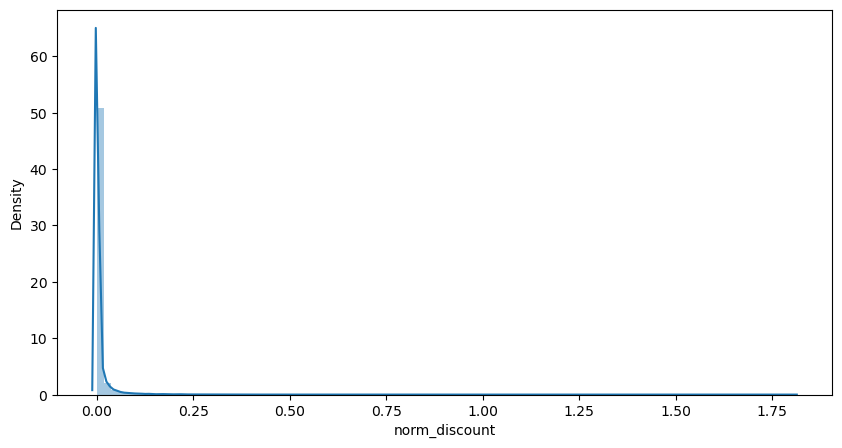

In [24]:
#normalise discount
df['norm_discount']=df['Discount']/df['Sales']

#histogram of normalised discount
plt.figure(figsize=(10,5))
sns.distplot(df['norm_discount'],bins=100)
plt.show()


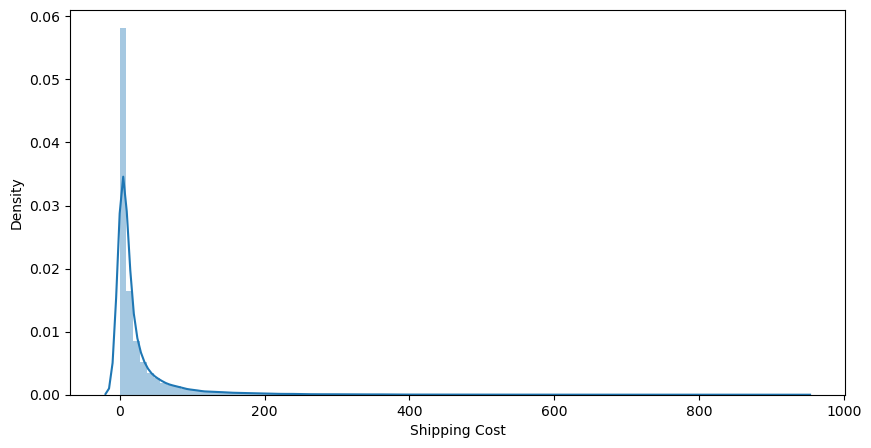

In [25]:
#histogram of shipping cost
plt.figure(figsize=(10,5))
sns.distplot(df['Shipping Cost'],bins=100)
plt.show()



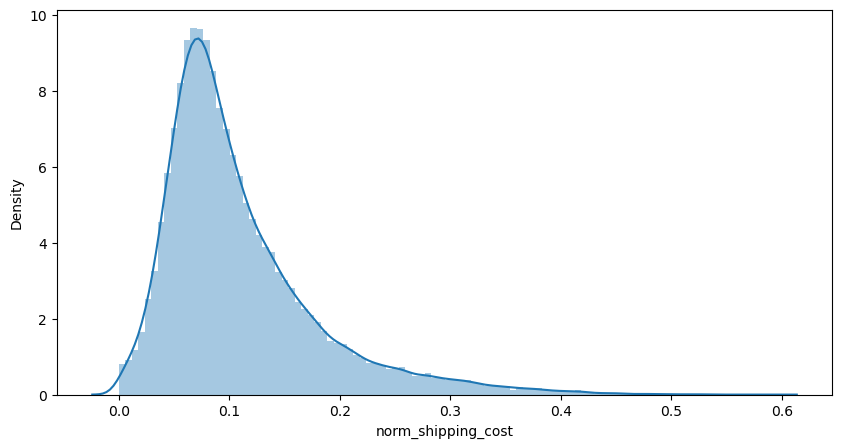

In [26]:
#normalise the shipping cost
df['norm_shipping_cost']=df['Shipping Cost']/df['Sales']

#plotting the histogram of normalised shipping cost
plt.figure(figsize=(10,5))
sns.distplot(df['norm_shipping_cost'],bins=100)
plt.show()


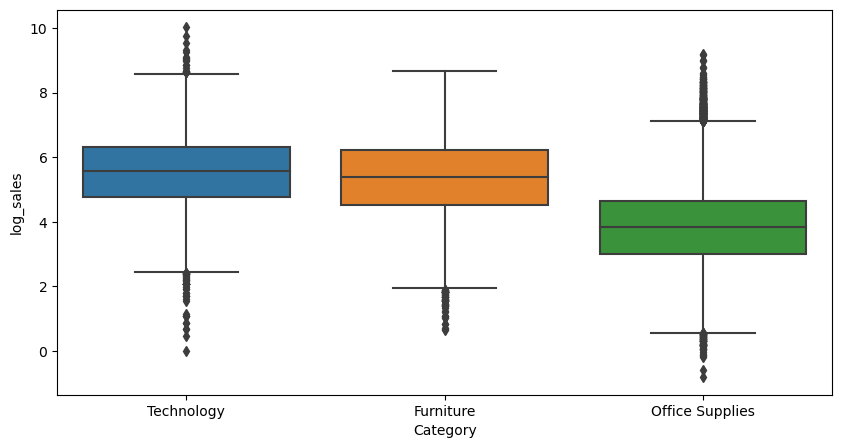

In [27]:
#box plot of log(sales) vs category
plt.figure(figsize=(10,5))
sns.boxplot(x='Category',y='log_sales',data=df)
plt.show()

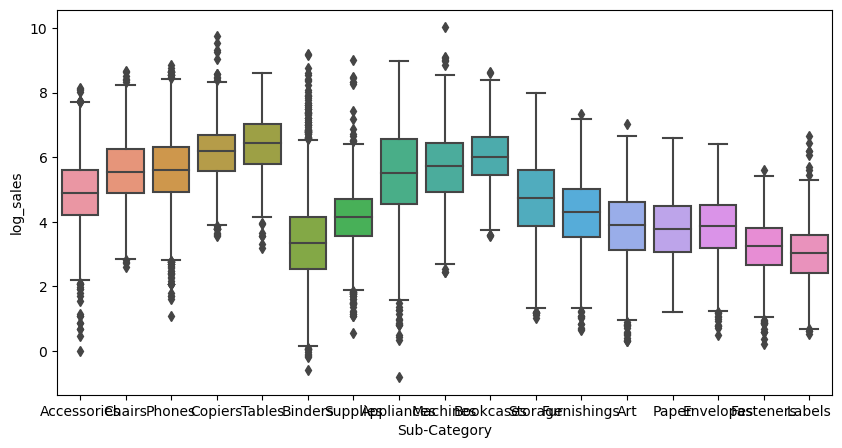

In [28]:
#box plot of log(sales) vs sub-category
df['Sub-Category'].unique()
plt.figure(figsize=(10,5))
sns.boxplot(x='Sub-Category',y='log_sales',data=df)
plt.show()


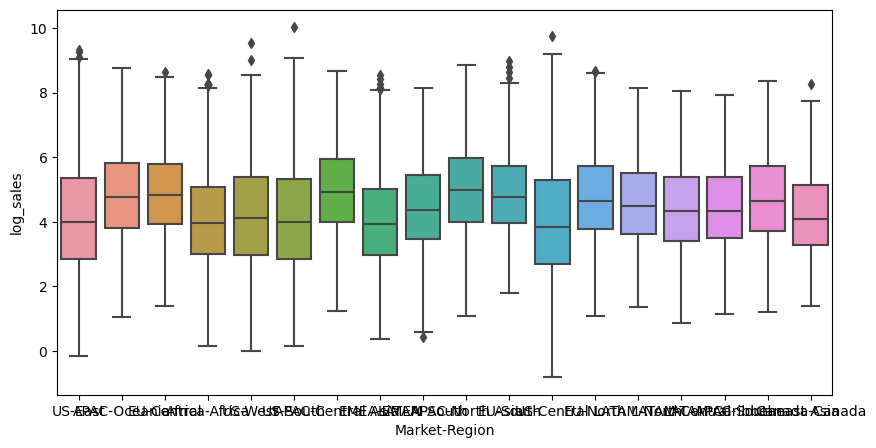

In [29]:
#box plot of log(sales) vs market_region
plt.figure(figsize=(10,5))
sns.boxplot(x='Market-Region',y='log_sales',data=df)
plt.show()

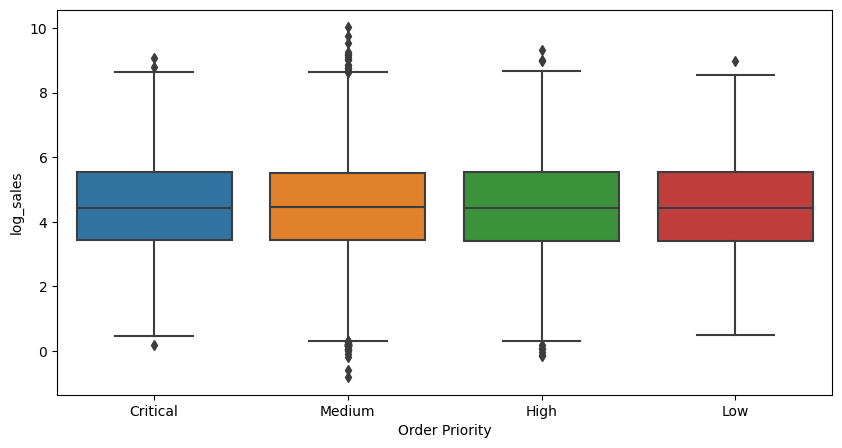

In [30]:
#box plot of log(sales) vs order priority
plt.figure(figsize=(10,5))
sns.boxplot(x='Order Priority',y='log_sales',data=df)
plt.show()


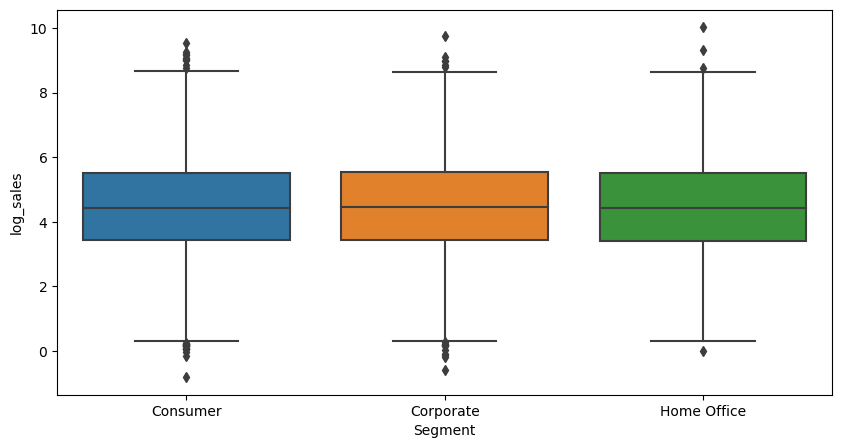

In [31]:
#box plot of log(sales) vs segment
plt.figure(figsize=(10,5))
sns.boxplot(x='Segment',y='log_sales',data=df)
plt.show()

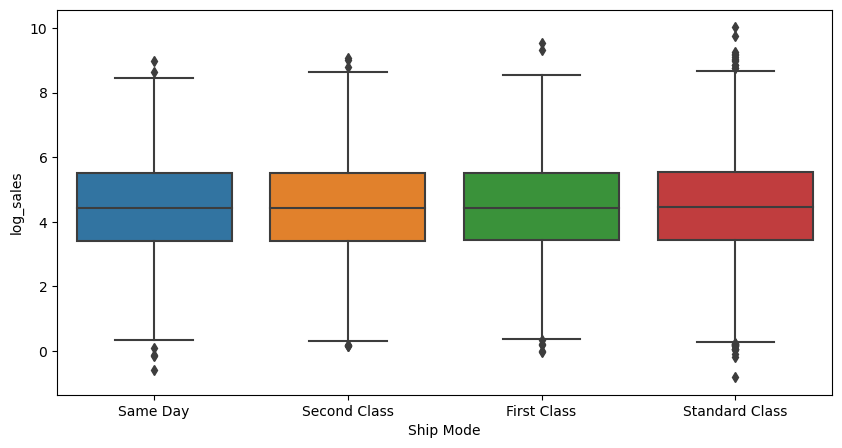

In [32]:
#box plot of log(sales) vs ship mode
plt.figure(figsize=(10,5))
sns.boxplot(x='Ship Mode',y='log_sales',data=df)
plt.show()

In [33]:
country_group = df.groupby(['Country'])
customer_distribution = country_group.agg({'Customer ID':'count'})
customer_distribution.columns = ['Customer_count']
customer_distribution.reset_index(inplace=True)
customer_distribution

,Country,Customer_count
0,Afghanistan,55
1,Albania,16
2,Algeria,196
3,Angola,122
4,Argentina,390
...,...,...
142,Venezuela,194
143,Vietnam,265
144,Yemen,30
145,Zambia,102


In [34]:
country_map = dict(type='choropleth',
           locations=customer_distribution['Country'],
           locationmode='country names',
           z=customer_distribution['Customer_count'],
            reversescale = True,
           text=customer_distribution['Country'],
           colorscale='earth',
           colorbar={'title':'Customer Count'})

layout = dict(title='Customer Distribution over Countries',
             geo=dict(showframe=False,projection={'type':'mercator'}))


import plotly.graph_objs as go
from plotly.offline import iplot
choromap = go.Figure(data = [country_map],layout = layout)
iplot(choromap)

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order Year',
       'Order Month', 'Order Year_Order Month', 'Market-Region', 'log_sales',
       'norm_profit', 'norm_discount', 'norm_shipping_cost'],
      dtype='object')

In [36]:
#drop the columns which are not required and store it in df1 dataframe
df.drop(['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Market','Region','Product ID','Product Name','Sales','Order Year','Order Month','Order Year_Order Month','norm_profit','norm_discount','norm_shipping_cost'],axis=1,inplace=True)



In [37]:
df.head()



,Ship Mode,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Market-Region,log_sales
0,Same Day,Consumer,Technology,Accessories,7,0.0,762.1845,933.57,Critical,US-East,7.744851
1,Second Class,Corporate,Furniture,Chairs,9,0.1,-288.7650,923.63,Critical,APAC-Oceania,8.218624
2,First Class,Consumer,Technology,Phones,9,0.1,919.9710,915.49,Medium,APAC-Oceania,8.551628
3,First Class,Home Office,Technology,Phones,5,0.1,-96.5400,910.16,Medium,EU-Central,7.969880
4,Same Day,Consumer,Technology,Copiers,8,0.0,311.5200,903.04,Critical,Africa-Africa,7.949077


In [38]:
#one hot encoding for categorical variables
df1=pd.get_dummies(df,columns=['Category','Sub-Category','Order Priority','Segment','Ship Mode','Market-Region','Ship Mode'],drop_first=True)


In [39]:
df1.head()

,Quantity,Discount,Profit,Shipping Cost,log_sales,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,...,Market-Region_LATAM-Central,Market-Region_LATAM-North,Market-Region_LATAM-South,Market-Region_US-Central,Market-Region_US-East,Market-Region_US-South,Market-Region_US-West,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,7,0.0,762.1845,933.57,7.744851,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,9,0.1,-288.7650,923.63,8.218624,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,0.1,919.9710,915.49,8.551628,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0.1,-96.5400,910.16,7.969880,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0.0,311.5200,903.04,7.949077,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
x=df1.drop(['log_sales'],axis=1)
y=df1['log_sales']
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)



In [41]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7584993371082717

In [42]:
#checking for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns
vif

,vif,features
0,1.186269,Quantity
1,1.219083,Discount
2,1.292888,Profit
3,1.613631,Shipping Cost
4,inf,Category_Office Supplies
5,12.364984,Category_Technology
6,inf,Sub-Category_Appliances
7,inf,Sub-Category_Art
8,inf,Sub-Category_Binders
9,3.227332,Sub-Category_Bookcases


In [43]:
threshold = 5
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['features'] = x_train.columns

# Remove any features with high VIF scores (greater than 5)
high_vif_features = vif[vif['vif'] > 5]['features'].values
x_train.drop(high_vif_features, axis=1)
x_test.drop(high_vif_features, axis=1)





,Quantity,Discount,Profit,Shipping Cost,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Furnishings,Sub-Category_Machines,Sub-Category_Phones,...,Market-Region_EU-North,Market-Region_EU-South,Market-Region_LATAM-Caribbean,Market-Region_LATAM-Central,Market-Region_LATAM-North,Market-Region_LATAM-South,Market-Region_US-Central,Market-Region_US-East,Market-Region_US-South,Market-Region_US-West
23541,4,0.00,30.3600,9.26,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23517,7,0.00,3.7800,9.28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,5,0.00,3177.4750,581.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29009,6,0.45,-41.7870,5.96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10615,14,0.10,80.7772,30.67,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174,2,0.17,180.9894,41.38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18415,6,0.10,41.4540,14.36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12677,2,0.00,4.7400,24.77,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4549,3,0.00,56.3010,72.26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
#new linear regression model
lr1=LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)


0.7584993371082717

MSE: 0.52, R^2: 0.76


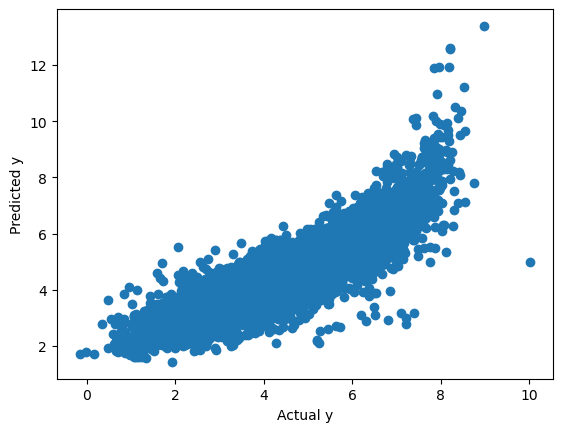

In [45]:
#predicting the values
y_pred=lr1.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R^2: {r2:.2f}")

# Visualize the results
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
plt.show()

In [46]:
x=df1.drop(['log_sales'],axis=1)
y=df1['log_sales']
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [47]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select = 10, step = 1)
selector = selector.fit(x_train,y_train)
print(selector.support_)
print(selector.ranking_)
selector.score(x_train, y_train)

[False False False False  True  True  True False False  True  True False
 False False  True False False False False  True False  True False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False  True
 False False]
[27 11 41 37  1  1  1  3  6  1  1 12  4  7  1  8 13  5 14  1  2  1 33 31
 32 38 39  1  9 21 40 35 30 16 28 17 34 36 29 24 23 26 25 15 18 22 19  1
 10 20]


0.4237129342171678

In [48]:
selected_feat= x_train.columns[(selector.support_)]
print(selected_feat)

Index(['Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Appliances', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Furnishings',
       'Sub-Category_Storage', 'Sub-Category_Tables', 'Ship Mode_Same Day',
       'Ship Mode_Same Day'],
      dtype='object')


In [49]:
#remodeling the linear regression model with the selected features
X_trainnew = x_train[selected_feat]
X_testnew = x_test[selected_feat]
lr3 = LinearRegression().fit(X_trainnew, y_train)
print(lr3.score(X_trainnew, y_train))

0.42371410918709596


In [50]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_trainnew.values,i) for i in range(X_trainnew.shape[1])]
vif['features']=X_trainnew.columns
vif

,vif,features
0,0.008553,Category_Office Supplies
1,0.016400,Category_Technology
2,1.034738,Sub-Category_Appliances
3,0.081726,Sub-Category_Bookcases
4,0.066948,Sub-Category_Chairs
5,0.005845,Sub-Category_Furnishings
6,1.087118,Sub-Category_Storage
7,0.269796,Sub-Category_Tables
8,inf,Ship Mode_Same Day
9,inf,Ship Mode_Same Day


In [51]:
#lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)


0.7276368223501195

In [52]:
zero_coef_indices = np.where(lasso.coef_ == 0)
print(x_train)
# Get names of features with zero coefficients
zero_coef_features = x_train.columns[zero_coef_indices]
print(zero_coef_features)

       Quantity  Discount     Profit  Shipping Cost  Category_Office Supplies  \
3448          9       0.0   266.4522          89.30                         0   
44578         2       0.0     6.2608           1.31                         0   
1980         13       0.0  1216.0200         135.25                         0   
35003         2       0.0     2.6400           3.59                         1   
41609         2       0.0     6.4800           1.90                         1   
...         ...       ...        ...            ...                       ...   
31554         1       0.0    41.0200           4.83                         0   
11652        12       0.0    81.0000          27.57                         1   
41943         5       0.4   -14.2000           1.83                         1   
8076          4       0.1   -27.0840          41.98                         0   
10939         2       0.0    14.8200          29.65                         0   

       Category_Technology 

In [53]:
#delete the features with zero coefficients and develop the model
X_trainnew = x_train.drop(zero_coef_features, axis=1)
X_testnew = x_test.drop(zero_coef_features, axis=1)
lasso2 = Lasso(alpha=0.1).fit(X_trainnew, y_train)
print(lasso2.score(X_trainnew, y_train))


0.5449802987014419


In [54]:
#ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print(ridge.score(x_train, y_train))


4.386236292614843
[ 2.08719996e-01 -1.27044656e+00  6.79943963e-05  6.66700742e-03
 -1.02268931e+00 -2.43814317e-01  1.20418044e+00 -1.78492011e-01
 -5.39323823e-01  6.29677740e-01  2.94333454e-01  8.83049656e-01
 -1.84026862e-01 -7.82964256e-01 -7.33238497e-01 -1.04147252e+00
  5.66076259e-01 -1.82938653e-01  5.50732365e-01  6.50099321e-01
  3.22490569e-02  1.07573093e+00  1.33436862e-01  1.19121397e-01
  2.04450396e-01 -7.64285046e-03 -5.92421511e-03  1.05730954e-02
  2.52678596e-02  4.20806119e-02  4.76927818e-03  2.38379144e-02
  5.57765748e-02 -2.43759540e-01 -1.27004139e-01 -2.22823404e-01
  5.25252519e-02  3.74688540e-02  8.27925241e-02 -2.91051761e-01
 -3.04461880e-01 -3.06882057e-01 -3.05780022e-01 -6.10084438e-01
 -5.68010554e-01 -5.73104565e-01 -5.57053714e-01  1.05730954e-02
  2.52678596e-02  4.20806119e-02]
0.7591378939228496


In [55]:
small_coef_indices = np.where(ridge.coef_ <= 0.01 )
print(x_train)
# Get names of features with zero coefficients
small_coef_features = x_train.columns[small_coef_indices]
print(small_coef_features)

       Quantity  Discount     Profit  Shipping Cost  Category_Office Supplies  \
3448          9       0.0   266.4522          89.30                         0   
44578         2       0.0     6.2608           1.31                         0   
1980         13       0.0  1216.0200         135.25                         0   
35003         2       0.0     2.6400           3.59                         1   
41609         2       0.0     6.4800           1.90                         1   
...         ...       ...        ...            ...                       ...   
31554         1       0.0    41.0200           4.83                         0   
11652        12       0.0    81.0000          27.57                         1   
41943         5       0.4   -14.2000           1.83                         1   
8076          4       0.1   -27.0840          41.98                         0   
10939         2       0.0    14.8200          29.65                         0   

       Category_Technology 

In [56]:
#dropping the features with small coefficients
X_trainnew = x_train.drop(small_coef_features, axis=1)
X_testnew = x_test.drop(small_coef_features, axis=1)
ridge2 = Ridge(alpha=0.1).fit(X_trainnew, y_train)
print(ridge2.score(X_trainnew, y_train))

0.5767286018714972


In [57]:
#elastic net regression model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1).fit(x_train, y_train)
print(elastic.intercept_)
print(elastic.coef_)
print(elastic.score(x_train, y_train))


4.059071342958465
[ 1.67716777e-01 -0.00000000e+00  4.86607734e-04  1.07804989e-02
 -7.48483451e-01  4.45145973e-02  0.00000000e+00 -0.00000000e+00
 -1.35638197e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  5.79705427e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
0.5614144875685114


In [58]:
#least angle regression model
from sklearn.linear_model import Lars
lar = Lars(n_nonzero_coefs=10,normalize=False).fit(x_train, y_train)
print(lar.intercept_)
print(lar.coef_)
print(lar.score(x_train, y_train))

4.282729151717759
[ 1.78691455e-01 -2.99608591e-01  3.88638035e-04  9.84899895e-03
 -1.07352867e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.95108448e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.82223694e-01 -1.64058811e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.41838218e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.53028921e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
0.6189881844240104


In [ ]:
#decision tree regression model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5).fit(x_train, y_train)
print(dt.score(x_train, y_train))


In [ ]:
#random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5).fit(x_train, y_train)
print(rf.score(x_train, y_train))


In [59]:
df.groupby('Order Year').agg({'Sales':['sum'],'Order ID':['count'],'Quantity':['mean'],'Customer Name':['nunique']}).reset_index()

KeyError: 'Order Year'

In [ ]:
df['flag']=1
pivot= df.pivot_table(index='Customer Name',columns='Order Year',values='flag',aggfunc='max',fill_value=0).reset_index()
pivot['noy']=pivot[2011]+pivot[2012]+pivot[2013]+pivot[2014]
pivot['noy'].describe()

In [ ]:
pivot1= df.pivot_table(index='Market',columns='Order Year',values='Sales',aggfunc='sum',fill_value=0).reset_index()
pivot1['perc_change']=((pivot1[2014]-pivot1[2011])/pivot1[2011])*100
pivot1

In [ ]:
pivot2= df.pivot_table(index='Region',columns='Order Year',values='Sales',aggfunc='sum',fill_value=0).reset_index()
pivot2['perc_change']=((pivot2[2014]-pivot2[2011])/pivot2[2011])*100
pivot2

In [ ]:
pd.crosstab(df['Region'],df['Market'])

In [ ]:
pivot3= df.pivot_table(index='Market-Region',columns='Order Year',values='Sales',aggfunc='sum',fill_value=0).reset_index()
pivot3['perc_change']=((pivot3[2014]-pivot3[2011])/pivot3[2011])*100
pivot3

In [ ]:
df['Date_Diff']=df['Ship Date']-df['Order Date']
df.groupby('Ship Mode')['Date_Diff'].mean().reset_index()

In [ ]:
pivot4= df.pivot_table(index='Ship Mode',columns='Order Year',values='Order ID',aggfunc='count',fill_value=0).reset_index()
pivot4['perc_change']=((pivot4[2014]-pivot4[2011])/pivot4[2011])*100
pivot4

In [ ]:
pivot5= df.pivot_table(index='Category',columns='Order Year',values='Order ID',aggfunc='count',fill_value=0).reset_index()
pivot5['perc_change']=((pivot5[2014]-pivot5[2011])/pivot5[2011])*100
pivot5

In [ ]:
pivot6= df.pivot_table(index='Sub-Category',columns='Order Year',values='Order ID',aggfunc='count',fill_value=0).reset_index()
pivot6['perc_change']=((pivot6[2014]-pivot6[2011])/pivot6[2011])*100
pivot6['perc_change13']=((pivot6[2014]-pivot6[2013])/pivot6[2013])*100
pivot6

In [ ]:
df[df['Customer Name']== 'Greg Maxwell'].pivot_table(index='Market', columns='Order Year',values='Sales',aggfunc='sum',fill_value=0).reset_index()

In [ ]:
df[df['Customer Name']== 'Greg Maxwell'].pivot_table(index='Segment', columns='Order Year',values='Sales',aggfunc='sum',fill_value=0).reset_index()

In [ ]:
df.groupby('Customer Name')['Segment'].nunique().reset_index().sort_values(by='Segment',ascending=False)

In [ ]:
pivot7=df.pivot_table(index='Order Priority', columns='Order Year', values='Order ID', aggfunc='count',fill_value=0).reset_index()
pivot7['perc_change']=((pivot7[2014]-pivot7[2011])/pivot7[2011])*100
pivot7['perc_change13']=((pivot7[2014]-pivot7[2013])/pivot7[2013])*100
pivot7


In [ ]:
df['price']=(df['Sales']-df['Shipping Cost'])/((1-df['Discount'])*df['Quantity'])
df

In [ ]:
pivot8=df[df['Product Name']=='Self-Adhesive Removable Labels'].pivot_table(index='Market', columns='Order Year', values='price', aggfunc='mean',fill_value=0).reset_index()
pivot8

In [ ]:
df['profit_flag']=np.where(df['Profit']<0,1,0)

In [ ]:
df1=df.groupby('Order Year').agg({'profit_flag':['sum'],'Order ID':['count']}).reset_index()
df1.columns=['Order Year','no_of_orders_in_loss','tot_no_of_orders']
df1['perc_loss_orders']=(df1['no_of_orders_in_loss']/df1['tot_no_of_orders'])*100
df1


In [ ]:
df['Loss_sales']=df['profit_flag']*df['Sales']
df2=df.groupby('Order Year').agg({'Loss_sales':['sum'],'Sales':['sum']}).reset_index()
df2.columns=['Order Year','loss_sales','tot_sales']
df2['perc_loss']=(df2['loss_sales']/df2['tot_sales'])*100
df2


In [ ]:
pivot10= df.pivot_table(index='Customer Name',columns='Order Year',values='Sales',aggfunc='mean',fill_value=0).reset_index()
pivot10

In [ ]:
pivot10['cagr']=(pivot10[2013]/pivot10[2011])**(1/3)-1
pivot10['2014_pred']=pivot10[2013]*(1+pivot10['cagr'])
pivot10

In [ ]:
from sklearn.metrics import r2_score
r2_score(pivot10[2014],pivot10['2014_pred'])


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(pivot10[[2011,2012,2013]],pivot10[2014])
reg.score(pivot10[[2011,2012,2013]],pivot10[2014])


In [ ]:
# Create a new pivot table with additional columns
pivot12 = df.pivot_table(index='Customer Name', columns=['Order Year', 'Category'], values=['Order ID'], aggfunc='count', fill_value=0).reset_index()

pivot12.columns=['Customer Name']+[ str(i[1])+'_'+str(i[2]) for i in pivot12.columns if i[0]!='Customer Name']
merged_pivot = pivot10.merge(pivot12, on='Customer Name')
merged_pivot.columns

In [ ]:
reg=LinearRegression()
reg.fit(merged_pivot[[2011,2012,2013,'2011_Furniture','2011_Office Supplies','2011_Technology','2012_Furniture','2012_Office Supplies','2012_Technology','2013_Furniture','2013_Office Supplies','2013_Technology']],merged_pivot[2014])
reg.score(merged_pivot[[2011,2012,2013,'2011_Furniture','2011_Office Supplies','2011_Technology','2012_Furniture','2012_Office Supplies','2012_Technology','2013_Furniture','2013_Office Supplies','2013_Technology']],merged_pivot[2014])

In [ ]:
# Create a new pivot table with additional columns
pivot12 = df.pivot_table(index='Customer Name', columns=['Order Year', 'Order Priority'], values=['Order ID'], aggfunc='count', fill_value=0).reset_index()

pivot12.columns=['Customer Name']+[ str(i[1])+'_'+str(i[2]) for i in pivot12.columns if i[0]!='Customer Name']
merged_pivot = merged_pivot.merge(pivot12, on='Customer Name')
merged_pivot

In [ ]:

x= merged_pivot.drop([2014,'2014_Furniture','2014_Office Supplies','2014_Technology','2014_Low','2014_Medium','2014_High'],axis=1,inplace=True)
y=merged_pivot[2014]

#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

#linear regression
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)



